In [1]:
#Задание 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('water.csv')
data = data[['location', 'town', 'mortality', 'hardness']]
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<Axes: title={'center': 'Зависимость смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

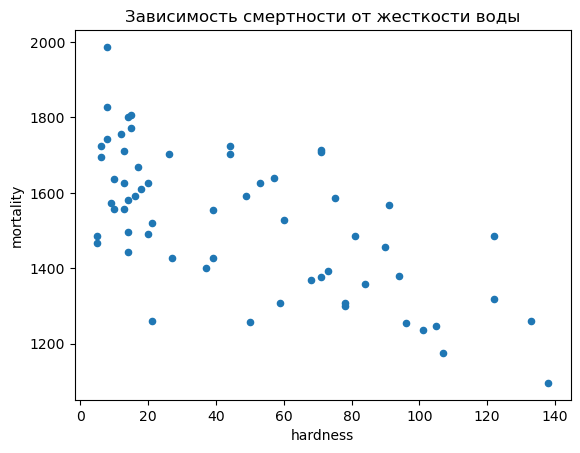

In [3]:
data.plot(kind='scatter', x='hardness', y='mortality', title='Зависимость смертности от жесткости воды')

In [4]:
# считаем коэф. корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# считаем коэф. корреляции Спирмана
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
X = data[['hardness']]
y = data['mortality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [9]:
model.coef_

array([-3.31576799])

In [10]:
model.intercept_

1678.9405326885008

In [11]:
y_pred = model.predict(X_test)


In [12]:
# y = -3.32 * x + 1678.94

In [13]:
# сравнение прогноза с фактом
data_temp = X_test.copy()

data_temp['y_pred'] = y_pred
data_temp['y_test'] = y_test
data_temp

,hardness,y_pred,y_test
0,105,1330.784894,1247
5,10,1645.782853,1558
46,14,1632.519781,1495
31,44,1533.046741,1702
13,78,1420.310629,1307
55,20,1612.625173,1625
34,133,1237.943390,1259
49,75,1430.257933,1587
12,21,1609.309405,1519
40,6,1659.045925,1696


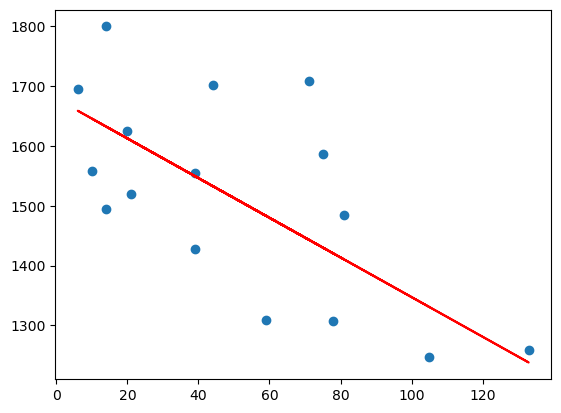

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

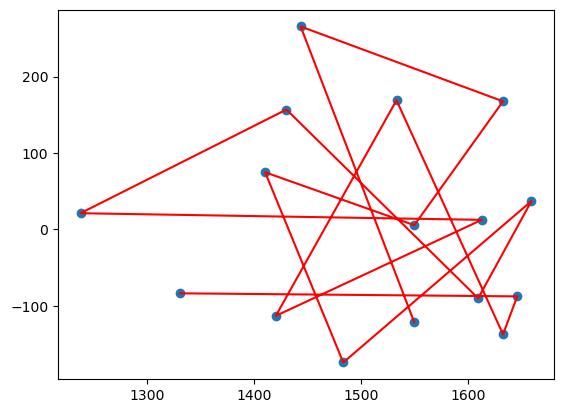

In [15]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='r')

Из визуализации остатков видна хаотичность их значений, значит модель не ошибается

In [45]:
model.score(X_test, y_test)
#Т.к коэффициент детерминации меньше 0,5, то линейная модель здесь работает плохо, лучше применить другую

0.410213439338294

In [17]:
#Задание 2
data_south = data[data['location'] == 'South']
data_north = data[data['location'] == 'North']

<Axes: title={'center': 'Зависимость смертности от жесткости воды в южных регионах'}, xlabel='hardness', ylabel='mortality'>

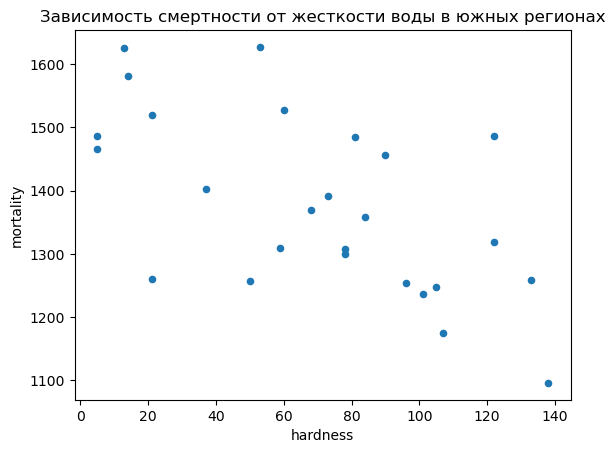

In [18]:
data_south.plot(kind='scatter', x='hardness', y='mortality', title='Зависимость смертности от жесткости воды в южных регионах')

<Axes: title={'center': 'Зависимость смертности от жесткости воды в северных регионах'}, xlabel='hardness', ylabel='mortality'>

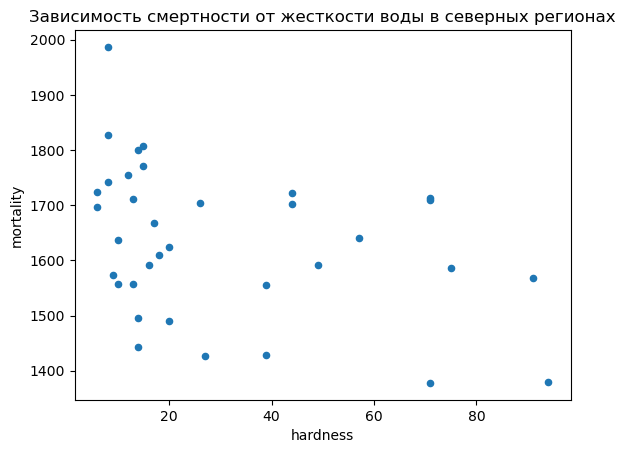

In [19]:
data_north.plot(kind='scatter', x='hardness', y='mortality', title='Зависимость смертности от жесткости воды в северных регионах')

In [20]:
# считаем коэф. корреляции Пирсона для южных регионов
data_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [21]:
# считаем коэф. корреляции Пирсона для северных регионов
data_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [22]:
# считаем коэф. корреляции Спирмана для южных регионов
data_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [23]:
# считаем коэф. корреляции Спирмана для северных регионов
data_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [24]:
X_s = data_south[['hardness']]
X_n = data_north[['hardness']]
y_s = data_south['mortality']
y_n = data_north['mortality']

In [25]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, random_state=42)
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, random_state=42)


In [26]:
model_south = LinearRegression()
model_north = LinearRegression()
model_south.fit(X_s_train, y_s_train)
model_north.fit(X_n_train, y_n_train)

LinearRegression()

In [27]:
model_south.coef_

array([-3.12141428])

In [28]:
model_north.coef_

array([-2.14659196])

In [29]:
model_south.intercept_

1604.2662828795662

In [30]:
model_north.intercept_

1691.0175604303595

In [31]:
# y = -3.12 * x + 1604.27 - для южных регионов
#y = -2.15 * x + 1691.02 - для северных регионов

In [32]:
y_s_pred = model.predict(X_s_test)
y_n_pred = model.predict(X_n_test)

In [33]:
# сравнение прогноза с фактом для южных регионов
data_south_temp = X_s_test.copy()

data_south_temp['y_s_pred'] = y_s_pred
data_south_temp['y_s_test'] = y_s_test
data_south_temp

,hardness,y_s_pred,y_s_test
18,122,1274.416838,1318
38,5,1662.361693,1486
0,105,1330.784894,1247
58,122,1274.416838,1486
27,37,1556.257117,1402
19,21,1609.309405,1260
33,59,1483.310221,1309


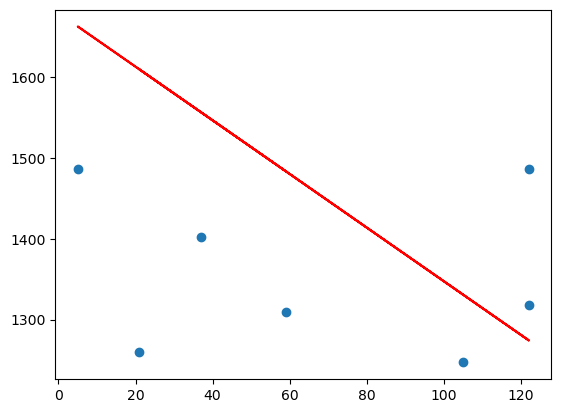

In [39]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

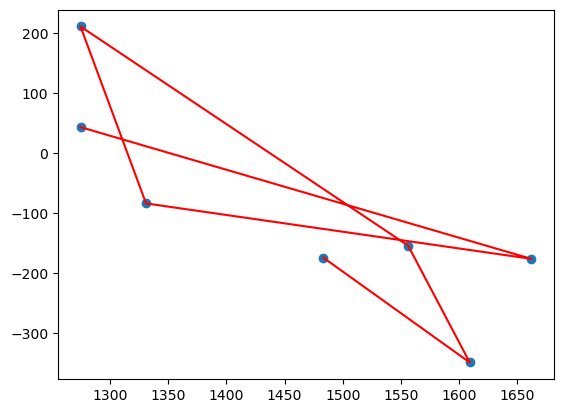

In [40]:
# график остатков для южных регионов
plt.scatter(y_s_pred, (y_s_test - y_s_pred))
plt.plot(y_s_pred, (y_s_test - y_s_pred), c='r')

In [34]:
# сравнение прогноза с фактом для северных регионов
data_north_temp = X_n_test.copy()

data_north_temp['y_n_pred'] = y_n_pred
data_north_temp['y_n_test'] = y_n_test
data_north_temp

,hardness,y_n_pred,y_n_test
45,8,1652.414389,1987
23,9,1649.098621,1574
43,14,1632.519781,1444
36,6,1659.045925,1724
26,16,1625.888245,1591
50,71,1443.521005,1713
31,44,1533.046741,1702
22,8,1652.414389,1742
16,39,1549.625581,1555


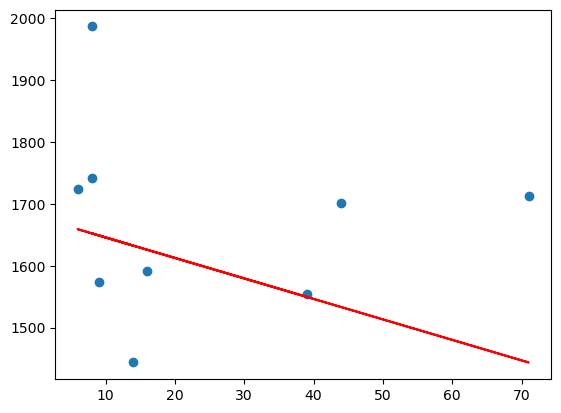

In [41]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

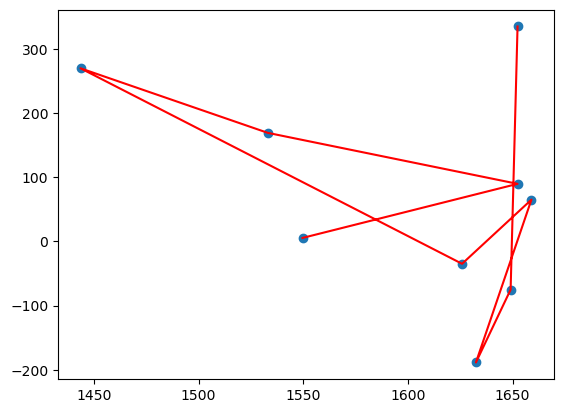

In [42]:
# график остатков для северных регионов
plt.scatter(y_n_pred, (y_n_test - y_n_pred))
plt.plot(y_n_pred, (y_n_test - y_n_pred), c='r')

In [43]:
model_south.score(X_s_test, y_s_test)
#Т.к коэффициент детерминации отрицательный, то взамосвязь или нелинейная, или данных недостаточно

-2.08160978733919

In [44]:
model_north.score(X_n_test, y_n_test)
#Т.к коэффициент детерминации отрицательный, то взамосвязь или нелинейная, или данных недостаточно

-0.09826474145023711